HELLO WORLD

In [30]:
%%capture
%pip install scipy matplotlib


In [58]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl

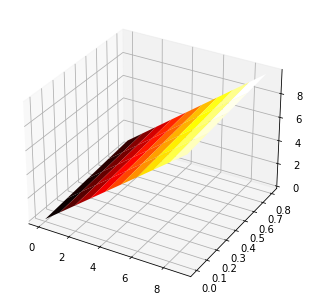

In [22]:
x = np.arange(0,10,1)
y = np.arange(0,1,0.2)

xs, ys = np.meshgrid(x, y)
# z = calculate_R(xs, ys)
zs = xs + ys

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='hot')
plt.show()

In [43]:

sample_rate, data = wavfile.read('sounds/BreakingGlass.wav')
print(f"number of samples = {data.shape[0]}")
data

number of channels = 20032


array([134, 134, 134, ..., 134, 128, 128], dtype=uint8)

In [44]:
length = data.shape[0] / sample_rate
print(f'sample len: {length}s')

sample len: 0.9084807256235827s


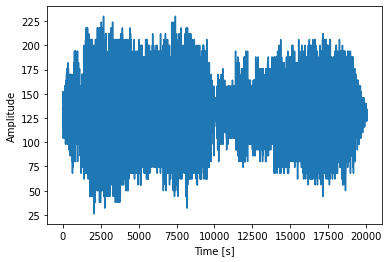

In [59]:
pl.xlabel("Time [s]")
pl.ylabel("Amplitude")
pl.plot(data)

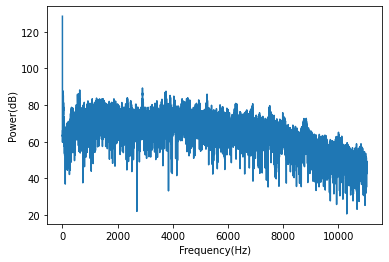

In [60]:
import pylab as pl
p = 20*np.log10(np.abs(np.fft.rfft(data[:sample_rate])))
f = np.linspace(0, sample_rate/2.0, len(p))

In [ ]:
pl.xlabel("Frequency(Hz)")
pl.ylabel("Power(dB)")
pl.plot(f, p)